In [156]:
import pandas as pd
import matplotlib.pyplot as plt

### Pegando os dados

In [157]:
estatisticas_market = pd.read_csv('arquivos_de_dados/estaticos_market.csv/estaticos_market.csv')

columns = estatisticas_market.columns

columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=182)

### Pre-processando dos dados

In [158]:
# setando percentil de NaN nas colunas
columns_with_percentil_NaN = estatisticas_market.isnull().sum() / estatisticas_market.shape[0]
columns_with_percentil_NaN

Unnamed: 0                 0.000000
id                         0.000000
fl_matriz                  0.000000
de_natureza_juridica       0.000000
sg_uf                      0.000000
                             ...   
qt_funcionarios_24meses    0.775958
tx_crescimento_12meses     0.840172
tx_crescimento_24meses     0.839900
tx_rotatividade            0.775958
qt_filiais                 0.000000
Length: 182, dtype: float64

In [159]:
# variaveis para plotar

def retrivie_qty_vars(percentil):
    return len(columns_with_percentil_NaN[columns_with_percentil_NaN <= (percentil/100)])

percentils = []
for index in range(100):
    percentils.append(index + 1)

length_vars = []
for index in range(100):
    length_vars.append(retrivie_qty_vars(percentils[index]))

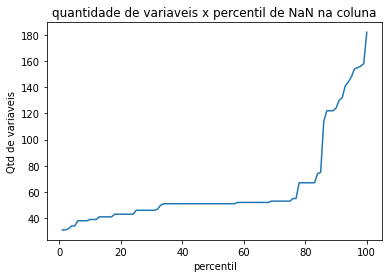

In [160]:
# plotando grafico quantidade de variaveis x percentil de NaN na coluna

plt.plot(percentils, length_vars)

plt.title("quantidade de variaveis x percentil de NaN na coluna")
plt.xlabel('percentil')
plt.ylabel('Qtd de variaveis')
plt.show()

Verificando o grafico acima escolhemos por volta dos 80%

In [161]:
# pegando colunas com indice menor que 80%
index_to_remove = columns_with_percentil_NaN[columns_with_percentil_NaN > 0.06]
df_to_work = estatisticas_market.drop(columns=index_to_remove.index).drop(columns=['Unnamed: 0'])
df_to_work

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,fl_simples_irregular,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,VERDE,ACIMA DE 1 ANO,ALTA,False,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,CINZA,ATE 1 ANO,BAIXA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,AMARELO,ACIMA DE 1 ANO,MEDIA,False,True,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,AMARELO,ACIMA DE 1 ANO,MEDIA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,VERDE,ACIMA DE 1 ANO,ALTA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,3.254795,1 a 5,False,...,VERDE,ACIMA DE 1 ANO,ALTA,False,False,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,8.953425,5 a 10,False,...,LARANJA,ACIMA DE 1 ANO,MUITO BAIXA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,True,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE SAUDE,SERVIÇO,20.745205,> 20,False,...,AMARELO,ACIMA DE 1 ANO,MEDIA,False,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,True,SOCIEDADE EMPRESARIA LIMITADA,RO,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,1.909589,1 a 5,False,...,VERDE,ACIMA DE 1 ANO,ALTA,False,False,"DE R$ 360.000,01 A R$ 1.500.000,00","DE R$ 360.000,01 A R$ 1.500.000,00",432734.4,432734.4,0
